# Healthcare Employee EDA and Attrition predictior model
* Attrition: Whether an employee left or not
* Main Goal: Build a model to predict the employee attrition based on different factors
# Steps:
1. Data wranggling
2. EDA
3. Model building and Testing

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\aarya\Downloads\watson_healthcare_modified.csv")

In [3]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

## data cleaning

In [5]:
df.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df = df.drop_duplicates()
df = df.dropna()

## EDA

In [9]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [10]:
#dara summary
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

<Axes: >

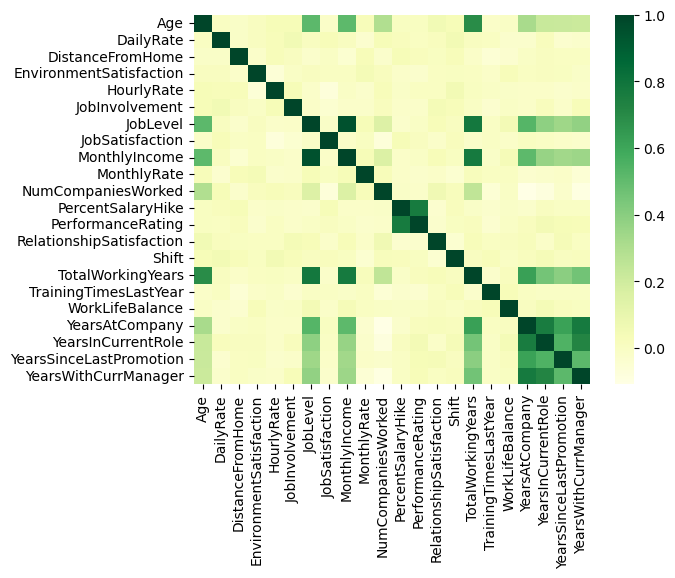

In [12]:
#correlation table
corr_df = df.drop(["EmployeeID","Department","Education","EducationField","EmployeeCount","Gender","Attrition","Over18",
                   "OverTime","JobRole","MaritalStatus","BusinessTravel","StandardHours"], axis=1)
#heatmap of variable correlation
sns.heatmap(corr_df.corr(method='pearson'),cmap='YlGn')

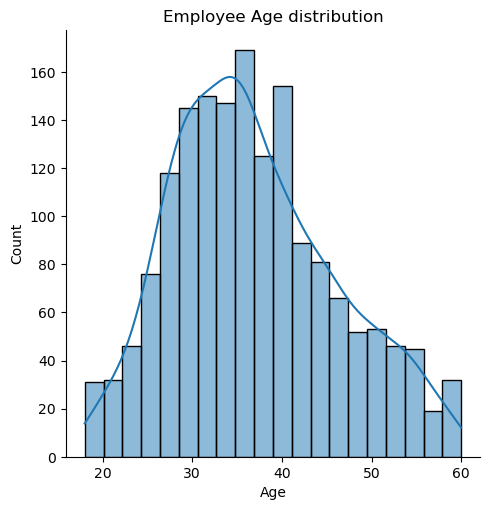

count    1676.000000
mean       36.866348
std         9.129126
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [13]:
sns.displot(df["Age"], kde=True)
plt.title("Employee Age distribution")
plt.show()
df["Age"].describe()

count    1676.000000
mean        7.033413
std         6.098991
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

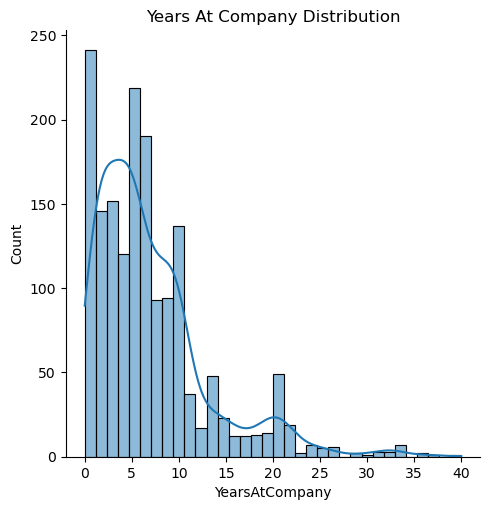

In [14]:
sns.displot(df["YearsAtCompany"], kde=True)
plt.title('Years At Company Distribution')
df['YearsAtCompany'].describe()

Text(0.5, 1.0, 'Average Monthly Income by Job Level')

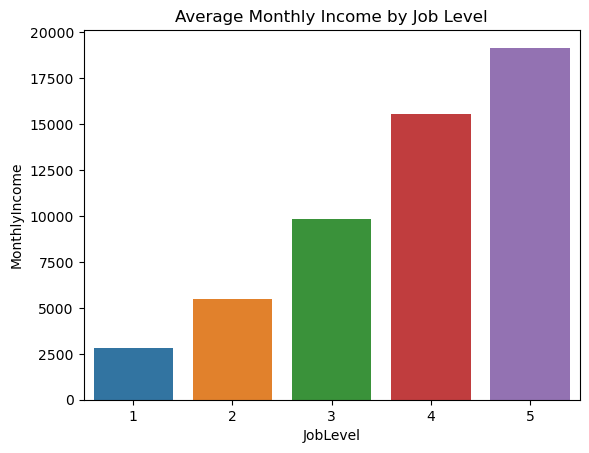

In [15]:
income= df[["JobLevel","MonthlyIncome"]].groupby(by="JobLevel").mean().reset_index()
sns.barplot(data=income, x="JobLevel", y="MonthlyIncome")
plt.title("Average Monthly Income by Job Level")

Highest Job level seems to have a the highest monthly income with the highest income being at level 5.

<Axes: xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

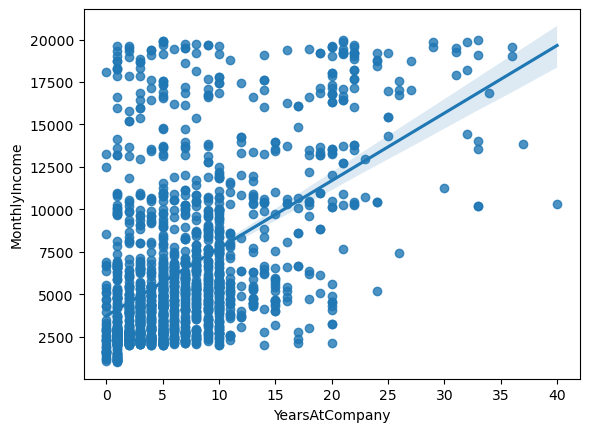

In [16]:
sns.regplot(data=df, x="YearsAtCompany", y="MonthlyIncome")

It seems to be a high correlation between the Years at the Company and the Monthly Income. The longer an employee is at the company, the higher is their income.

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [19]:
df=df.drop('Over18',axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

In [21]:
df['Attrition'] 

0       0
1       0
2       1
3       0
4       0
       ..
1671    1
1672    0
1673    0
1674    0
1675    0
Name: Attrition, Length: 1676, dtype: int32

In [22]:
onehdf=pd.get_dummies(df,columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])
onehdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   EmployeeID                        1676 non-null   int64
 1   Age                               1676 non-null   int64
 2   Attrition                         1676 non-null   int32
 3   DailyRate                         1676 non-null   int64
 4   DistanceFromHome                  1676 non-null   int64
 5   Education                         1676 non-null   int64
 6   EmployeeCount                     1676 non-null   int64
 7   EnvironmentSatisfaction           1676 non-null   int64
 8   HourlyRate                        1676 non-null   int64
 9   JobInvolvement                    1676 non-null   int64
 10  JobLevel                          1676 non-null   int64
 11  JobSatisfaction                   1676 non-null   int64
 12  MonthlyIncome                     

In [23]:
scaler = StandardScaler()
X= onehdf.drop('Attrition',axis=1)
y= onehdf['Attrition']
X_scaled = scaler.fit_transform(X)

In [24]:
n_components = 45 # You can change this value based on your requirement
pca = PCA(n_components=n_components)

# Fit PCA on the standardized data
X_pca = pca.fit_transform(X_scaled)

In [25]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", X_pca)

Explained Variance Ratio: [[-3.48620530e-01  1.69779007e+00  3.24589706e+00 ...  9.42555564e-16
  -9.52723919e-16  3.19539406e-16]
 [ 1.99765158e-01 -1.79130659e+00 -1.75723631e+00 ... -7.10410187e-16
  -1.75227998e-17  2.81324942e-16]
 [-2.81723491e+00 -9.81848884e-02  1.37153151e+00 ... -5.50377061e-16
  -4.78090887e-16 -2.00979488e-16]
 ...
 [-3.29016714e+00 -1.02083679e+00  1.64069625e+00 ... -1.30499672e-16
   2.03494880e-16 -4.48693691e-17]
 [ 4.21525368e+00 -1.18526462e+00  2.19778344e-01 ...  3.48592311e-16
   1.20491170e-16  1.76189908e-16]
 [-2.33226981e-01  2.18260593e+00  8.97806136e-01 ... -8.99620841e-17
   7.48989058e-17 -8.72641048e-17]]


In [26]:
principal_components_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
principal_components_df
# If you have the target variable in your original DataFrame, you can add it to the new DataFrame

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,-0.348621,1.697790,3.245897,-0.177395,0.208306,1.305378,-0.580367,-0.918245,-0.479658,-1.873267,...,0.339467,-0.054740,-0.455344,-0.438574,-0.617138,-0.023699,-3.674772e-15,9.425556e-16,-9.527239e-16,3.195394e-16
1,0.199765,-1.791307,-1.757236,-0.758385,1.887540,-0.725779,0.704081,2.263163,-0.699995,-1.581311,...,0.245449,0.107127,-0.058927,-0.645555,-0.484574,0.208988,-1.644029e-16,-7.104102e-16,-1.752280e-17,2.813249e-16
2,-2.817235,-0.098185,1.371532,0.374725,0.353555,3.093720,-1.111124,-0.040212,-0.249303,0.353780,...,0.659290,-0.041474,0.188402,0.149060,-0.025001,0.023893,9.097149e-16,-5.503771e-16,-4.780909e-16,-2.009795e-16
3,-1.170514,-1.357819,2.046844,-0.019542,2.444565,-0.851771,1.078029,-1.995751,0.362978,-1.741087,...,-0.972321,1.065740,-0.464536,0.462809,-0.063456,-0.054973,-1.614464e-15,-6.462334e-16,3.803832e-16,-6.421155e-16
4,-1.956580,-0.048137,-1.387347,0.795515,-1.181353,0.365581,-1.199582,-0.587371,-0.346283,1.856966,...,-0.146781,-0.002542,-0.300413,0.113422,-0.017201,-0.183084,4.781872e-16,8.537826e-16,-2.989055e-16,-6.544372e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,-3.034733,0.060779,1.416860,-0.380648,0.458997,2.379946,0.279547,0.868764,1.350776,-0.116658,...,0.371501,0.066249,0.884483,0.188794,-0.002352,0.045586,1.299074e-16,5.844003e-17,8.747370e-18,4.131591e-17
1672,0.626791,3.117768,2.832194,2.428056,0.117271,-0.147655,0.004140,1.168510,0.186477,-0.380260,...,-0.189212,-0.164077,1.018543,-0.258517,0.210067,0.136606,-2.765688e-16,-5.548132e-18,-1.477724e-16,2.079741e-17
1673,-3.290167,-1.020837,1.640696,-2.104555,-1.189463,-0.383514,-0.802969,-0.878708,0.252983,-0.884832,...,-0.106887,-0.146074,-0.126574,0.132418,-0.038197,-0.023435,-3.582826e-16,-1.304997e-16,2.034949e-16,-4.486937e-17
1674,4.215254,-1.185265,0.219778,-1.087238,-0.400808,-2.349882,-0.123021,-0.103325,1.843967,-1.377302,...,-0.128807,-0.742407,0.462819,0.729397,-0.394163,0.175078,-1.131291e-15,3.485923e-16,1.204912e-16,1.761899e-16


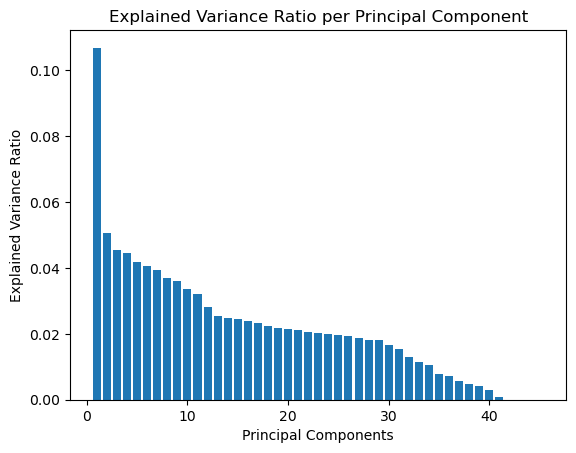

In [27]:
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

In [28]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1671    1
1672    0
1673    0
1674    0
1675    0
Name: Attrition, Length: 1676, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [31]:
X_train

array([[-0.90349757, -1.08107761, -0.27288868, ..., -0.67256203,
         0.62981479, -0.62981479],
       [ 0.61418174, -0.53321656,  1.14189568, ...,  1.4868517 ,
         0.62981479, -0.62981479],
       [-0.66593794, -0.42364435, -1.62789341, ..., -0.67256203,
         0.62981479, -0.62981479],
       ...,
       [-0.71236411, -0.42364435, -1.62789341, ..., -0.67256203,
         0.62981479, -0.62981479],
       [ 0.68220644, -0.64278877, -1.18452789, ...,  1.4868517 ,
         0.62981479, -0.62981479],
       [ 1.60603694,  0.56250555,  0.64373217, ...,  1.4868517 ,
         0.62981479, -0.62981479]])

In [32]:
y_train

1622    0
1202    0
221     0
113     0
706     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: Attrition, Length: 1173, dtype: int32

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train,y_train)


LogisticRegression()

In [35]:
y_train

1622    0
1202    0
221     0
113     0
706     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: Attrition, Length: 1173, dtype: int32

In [36]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics (e.g., R-squared, mean squared error)
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 0.30284130284130284
Mean Squared Error: 0.0874751491053678


In [37]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [38]:
from sklearn.metrics import classification_report

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125248508946322

In [40]:
report_multiclass = classification_report(y_test, y_pred)
print(report_multiclass)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       429
           1       0.75      0.61      0.67        74

    accuracy                           0.91       503
   macro avg       0.84      0.79      0.81       503
weighted avg       0.91      0.91      0.91       503



In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, y_pred)

array([[414,  15],
       [ 29,  45]], dtype=int64)

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [44]:
roc_auc

0.7865715365715366

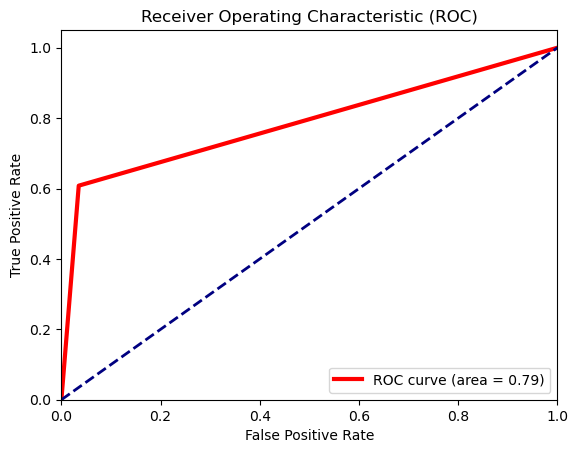

In [45]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=2)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [49]:
y_pred1 = knn.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred1)

array([[424,   5],
       [ 63,  11]], dtype=int64)

In [52]:
r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
mse

0.13518886679920478

In [53]:
r2

-0.07742707742707733

In [52]:
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.8648111332007953


In [53]:
report1 = classification_report(y_test, y_pred1)

In [86]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred1)

In [87]:
roc_auc1

0.5684968184968185

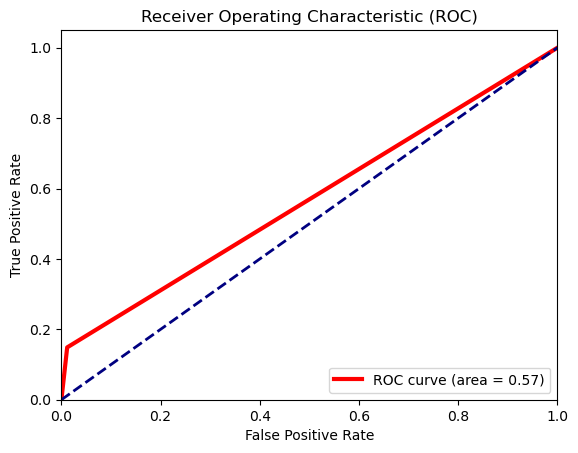

In [90]:
plt.figure()
plt.plot(fpr1, tpr1, color='red', lw=3, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import xgboost as xgb

In [56]:
params = {
    'objective': 'binary:logistic', 
    'eta': 0.1,  
    'max_depth': 4,  
    'n_estimators': 100 
}
model2 = xgb.XGBClassifier(**params)


In [57]:
model2.fit(X_train, y_train)


y_pred2 = model.predict(X_test)

In [58]:
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.9125248508946322


In [59]:
confusion_matrix(y_test, y_pred2)

array([[414,  15],
       [ 29,  45]], dtype=int64)

In [60]:
r2_2 = r2_score(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
mse2

0.0874751491053678

In [61]:
r2_2

0.30284130284130284

In [71]:
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

report2 = classification_report(y_test, y_pred2)
print("Classification Report:\n", report2)

Accuracy: 0.9125248508946322
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       429
           1       0.75      0.61      0.67        74

    accuracy                           0.91       503
   macro avg       0.84      0.79      0.81       503
weighted avg       0.91      0.91      0.91       503



In [83]:
fpr2, tpr2, thresholds1 = roc_curve(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred2)

In [84]:
roc_auc2

0.7865715365715366

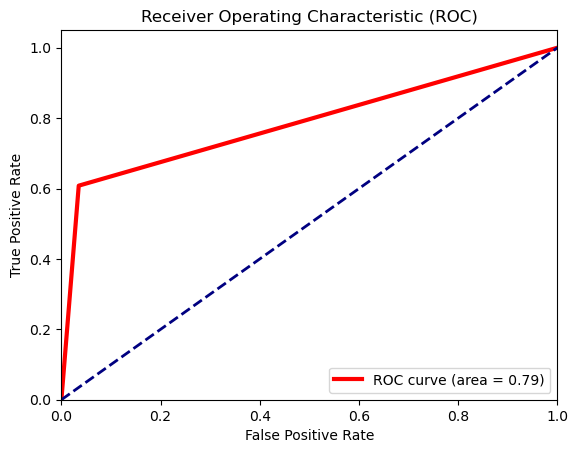

In [91]:
plt.figure()
plt.plot(fpr2, tpr2, color='red', lw=3, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()